**1.Import Libraries**

In [22]:
import os 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
import tensorflow as tf
%matplotlib inline

import seaborn as sns
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

**2.Load Training Dataset**

In [23]:
data=pd.read_csv("data.csv")
data['Date']=pd.to_datetime(data['Date']).dt.date
data.set_index("Date",inplace=True)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-01,2772.24,2805.57,2742.53,2755.62,"21,713,431,007.74"
2024-07-31,2708.25,2791.02,2707.57,2760.90,"21,911,503,161.06"
2024-07-30,2669.41,2709.89,2609.02,2696.65,"17,266,391,542.97"
2024-07-29,2706.73,2737.68,2655.15,2661.09,"19,609,177,106.29"
2024-07-28,2606.42,2708.58,2606.40,2681.56,"15,810,596,235.45"


In [24]:
output_dir_path = "E:\\Desktop\\Final Project\\results\\"

**3.Visualization of response variable**

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x400 with 0 Axes>

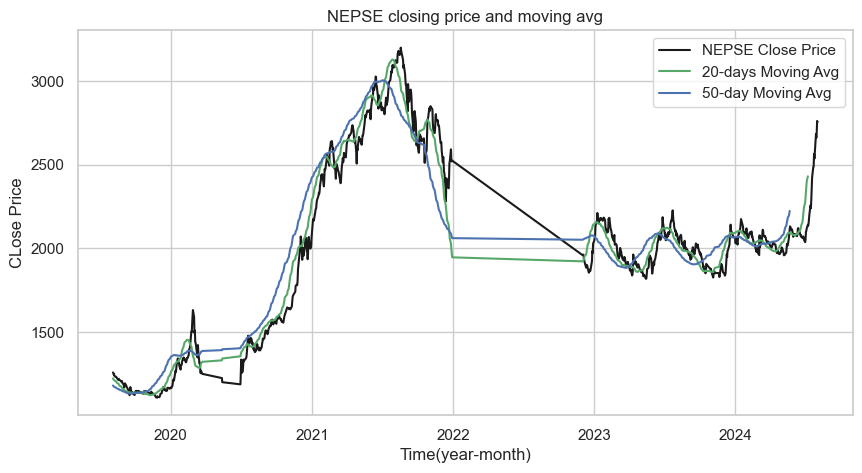

In [25]:
df=data.copy() #copy of dataframe data to df
fin=plt.figure(figsize=(15,4))
df['MA_20']=df['Close'].rolling(20).mean() #calculates 20 days moving average of the closing price cp
df['MA_50']=df['Close'].rolling(50).mean()   #calculates 50days moving avearge of cp

fig=plt.figure(figsize=(10,5))  # create new fig with size 10 inch by 5 inches
fig.set(facecolor="white")

plt.plot(df['Close'],'k',label='NEPSE Close Price')   #plots the cp in balck('k') with label Nepse
plt.plot(df['MA_20'],'g',label='20-day MA')           #plots 20 days movimng avg with green and lable as 20 days
plt.plot(df['MA_50'],'b',label='50-day MA')           #plots 50 days movimng avg with blue and lable as 20 days

plt.legend(['NEPSE Close Price','20-days Moving Avg','50-day Moving Avg'],loc='upper right')       #add legend to plot in upper right corner 
plt.title('NEPSE closing price and moving avg')  #set title of the plot
plt.xlabel('Time(year-month)')           #labels the x-axis
plt.ylabel('CLose Price')                #labels the y-axis

#specify the path where plot image will be saved
output_dir_path = "E:\\Desktop\\Final Project\\results\\"
fig.savefig(output_dir_path + 'original_data_plus_moving_averages.png', dpi=600)     #save fig as png file
plt.show

**4.Clean percentage strings and convert them to floats**

In [26]:
def clean_percentage(column):
    return column.replace('[\%,]', '', regex=True).astype(float) / 100.0

# Apply the function to all columns with percentage strings
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = clean_percentage(data[col])
        except ValueError:
            data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with any NaN values
data = data.dropna()

**5.Correlation Heatmap**

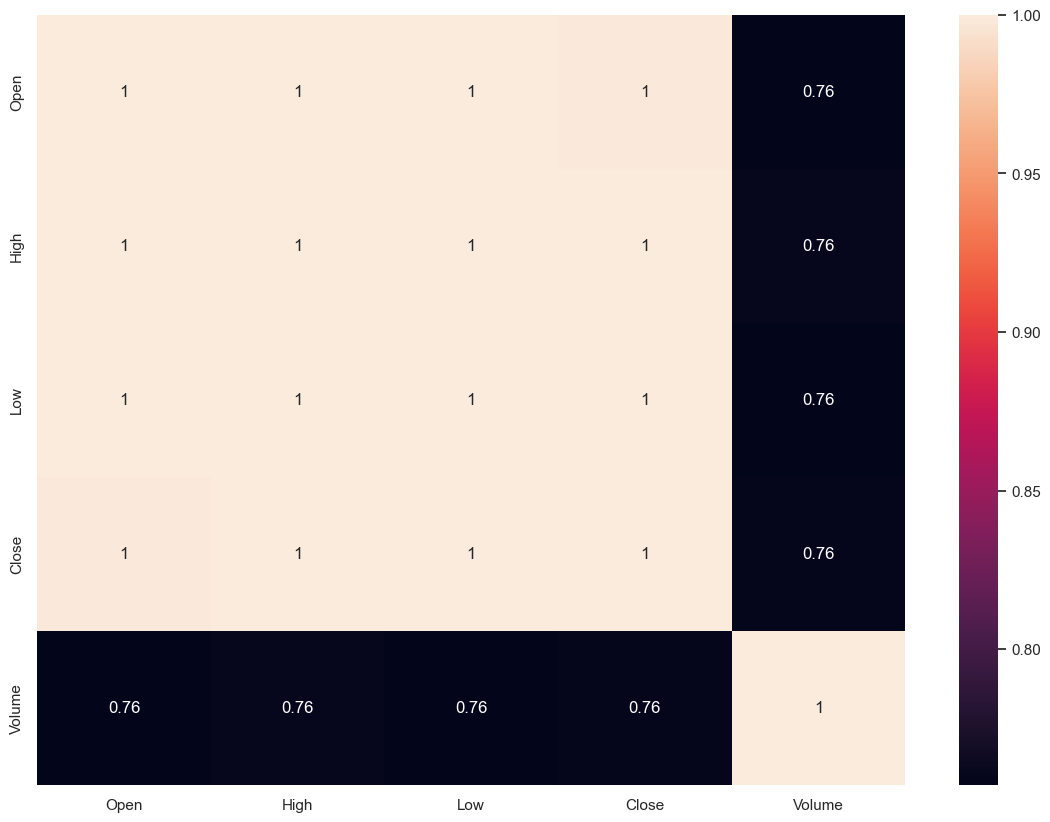

In [27]:
fig=plt.figure(figsize=(14,10))  #create new fig with size 14 inch by 10 inches

sns.heatmap(data.corr(),annot=True)   # create correlation matrix of dataframe data and create heatmap using seaborn
sns.set_style("whitegrid")   #set white background color

fig.savefig(output_dir_path+"Correlation_heatmap.pdf",dpi=600)  # save img as pdf 

**5.Creating x_train and y_train data structures**

In [28]:
X_train=[]
Y_train=[]
for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i,0])
    Y_train.append(scaled_training_set[i,0])
X_train=np.array(X_train)
Y_train=np.array(Y_train)
print (X_train.shape)
print(Y_train.shape)

NameError: name 'scaled_training_set' is not defined

**6.Reshape the data**

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

**7.Building MOdel by importimg crucial libraries and adding diff layes to oLSTM**

In [ ]:
from keras.models import Sequential 
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout